
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer

1) **Fake Reviews Detection** : Amazon's task of detecting fake reviews is first and foremost a classification problem. The company's main goal in developing such a system would be to classify each review as "fake" or not, and filter out the former. A possible data set might be comprised of some combination of the following potential predictors:
    
    * user account information (i.e. recency of account opening, time of posting, purchase history, IP address)
    * content of review (i.e. number of stars, number of words in subject/review, keywords, references to product creator)
    * user review history (i.e. previous suggested reviews, review history)

Their task of building the original detection system would be valuable in helping Amazon retain integrity with its customers while helping protect suppliers from targeted fake review schemes.

2) **Customer Segmentation** : Separating Amazon customers into segments -- or clusters -- is integral to the efficient use of advertising dollars. It's likely the backbone of a highly functioning reccomendation system for both products and reviews to drive supplement purchases, repeat orders, scheduled deliveries and more. Clustering would likely make use of some of the user listed data below, and plenty more:

    * account information (i.e. recency of account opening, purchase history)
    * demographic information (i.e. state and location from shipping address, age, location)
    * movement habits (i.e. are purchases made at home? from work? any variables created by looking at changes within ISP address would potentially be useful)
    * usage habits (i.e. time spent on site, visits/purchases per month/year, Prime membership and renewals, time spend shopping, reading reviews, watching movies)
    * search history (i.e. most frequent categories, items, frequency of searches converted to sales)
    * joint account information, when relevant (i.e. how many users access the account, number of credit cards/shipping addresses... this could prove tricky for clustering a single account that clearly has a number of users with different habits, though purchases can be connected to different account users based on shipping addresses)

# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

log[p(t|theta)] = sum from i to n of: -log[C]-5log[theta]+4log[t]-t/theta 

derivative wrt t =0 
-5/theta +(sum from i to n of:t(i))/theta^2 = 0 

theta = (sum from i to n of:t(i))/5

In [1]:
intervals = [1,3,1.5,4,2,7,1.2,2,4,3.1]
sum(intervals)/5

5.76

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

import seaborn
%config InlineBackend.figure_format = 'retina'
%pylab inline
boston = datasets.load_boston()

X = boston.data
y = boston.target

Populating the interactive namespace from numpy and matplotlib


In [5]:
#3a
row , col = X.shape
print "Number of rows is:" , row
print "Number of columns is:" , col
X[:5,]

Number of rows is: 506
Number of columns is: 13


array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
          0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
          6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
          2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
          4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
          7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
          9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00,
          0.00000000e+00,   4.69000000e-01,   7.18500000e+00,
          6.11000000e+01,   4.96710000e+00,   2.00000000e+00,
          2.42000000e+02,   1.78000000e+01,   3.92830000e+02,
          4.03000000e+00],
       [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00,
          0.00000000e+00,   4.58000000e-01,   6.99800000e+00,
          4.58000000e+01,   6.06220000e+00,   3.000

In [ ]:
#3b


In [14]:
#3c
test_set_size = 400
X_mlr_train = X[:test_set_size,]
X_mlr_test = X[test_set_size:,]
y_mlr_train = y[:test_set_size]
y_mlr_test = y[test_set_size:]

regr_split = linear_model.LinearRegression()
regr_split.fit(X_mlr_train, y_mlr_train)
y_mlr_pred = regr_split.predict(X_mlr_test)
print 'Coefficients:', regr_split.coef_
print "Mean squared error:" , mean_squared_error(y_mlr_test, y_mlr_pred)


Coefficients: [ -1.91246374e-01   4.42289967e-02   5.52207977e-02   1.71631351e+00
  -1.49957220e+01   4.88773025e+00   2.60921031e-03  -1.29480799e+00
   4.84787214e-01  -1.54006673e-02  -8.08795026e-01  -1.29230427e-03
  -5.17953791e-01]
Mean squared error: 38.1643386432


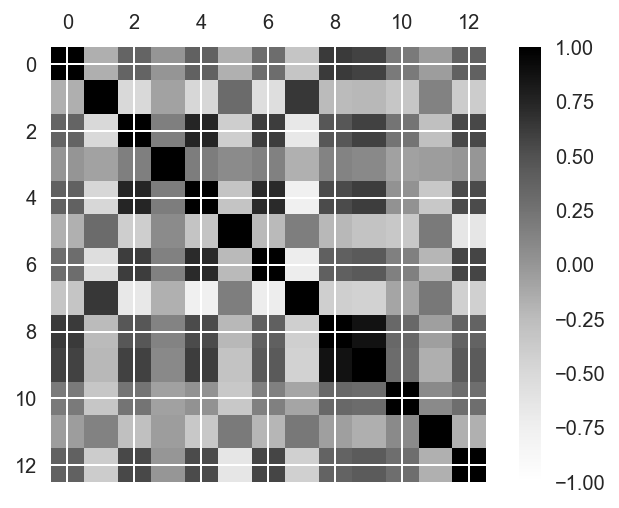

In [51]:
#3d
residual_df = pd.DataFrame(X_mlr_train)
resd_y = pd.DataFrame(y_mlr_train)
full_train = residual_df.merge(resd_y, right_index = True,left_index = True)
#seaborn.residplot(full_train[:11],full_train[12] )
#full_train.iloc[:,[1,1,11]]



correlations = residual_df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)

plt.show()

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [9]:
X_new = np.concatenate((X, np.square(X)), axis=1)

In [10]:
X_new_mlr_train = X_new[:test_set_size,]
X_new_mlr_test = X_new[test_set_size:,]
y_mlr_train = y[:test_set_size]
y_mlr_test = y[test_set_size:]
regr_split = linear_model.LinearRegression()
regr_split.fit(X_new_mlr_train, y_mlr_train)
y_mlr_pred = regr_split.predict(X_new_mlr_test)
print 'Coefficients:', regr_split.coef_
print "Mean squared error:" , mean_squared_error(y_mlr_test, y_mlr_pred)


Coefficients: [ -6.28564029e-01  -4.69283413e-02   1.35998008e-01   1.12670518e+00
  -3.89085940e+01  -1.71470367e+01  -1.92714017e-02  -2.49211073e+00
   6.85468872e-01  -1.10900553e-01  -6.25152381e+00   4.25358263e-02
  -1.43915460e+00   5.03672853e-03   5.35234383e-04  -4.91394588e-03
   1.12670518e+00   1.11228197e+01   1.61544902e+00   2.97952872e-04
   1.37189224e-01  -3.37949389e-02   1.47365245e-04   1.54711150e-01
  -7.67778717e-05   2.70068424e-02]
Mean squared error: 32.9465487203


## Answer



# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

In [55]:
lasso = Lasso(random_state=0)
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)

NameError: name 'GridSearchCV' is not defined

In [ ]:
#4

LassoCV(alphas=None, cv=10, max_iter=10000)


1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer

interpretability: 
    In estimating housing prices based off of a large set of predictors, using a model with many interaction terms 


A regression model that suffers from collinearity from its predictors would be better in the general form, without interaction terms. Take an example of a regression model that predicts NBA success based on players' shoe size and height. It's likely that shoe size and height are closely and positively correlated (colinear) and have similar effects on NBA success, and thus an interaction term that captured their effect would exascerbate the effects of colinearity on the regression. A model with only one term would likely be preferable to one that included both, let alone one that had an interaction term.



We would expect a similar situation for a regression model that was prone to outliers. Any interaction between two independent variables in which one (or both) have significant outliers would threaten to place even more undue weight on the extreme values.
